In [7]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numbers

In [2]:
# Grab a simulation: http://astro-lsst-01.astro.washington.edu:8081/fbs_db/baseline/baseline_v1.5_10yrs.db
conn = sqlite3.connect('baseline_v1.5_10yrs.db')
# Just read the whole thing into pandas
df = pd.read_sql('select * from summaryallprops;', conn)

In [8]:
# Handy function from lsst.sims.utils
def _angularSeparation(long1, lat1, long2, lat2):
    """
    Angular separation between two points in radians

    Parameters
    ----------
    long1 is the first longitudinal coordinate in radians

    lat1 is the first latitudinal coordinate in radians

    long2 is the second longitudinal coordinate in radians

    lat2 is the second latitudinal coordinate in radians

    Returns
    -------
    The angular separation between the two points in radians

    Calculated based on the haversine formula
    From http://en.wikipedia.org/wiki/Haversine_formula
    """

    t1 = np.sin(lat2/2.0 - lat1/2.0)**2
    t2 = np.cos(lat1)*np.cos(lat2)*np.sin(long2/2.0 - long1/2.0)**2
    _sum = t1 + t2

    if isinstance(_sum, numbers.Number):
        if _sum<0.0:
            _sum = 0.0
    else:
        _sum = np.where(_sum<0.0, 0.0, _sum)

    return 2.0*np.arcsin(np.sqrt(_sum))

In [11]:
# Point we want to evaluate at:
ra = 0.
dec = -10.
# only look for observations within 1.75 degrees of our goal point
d_limit = 1.75 # Degrees


distances = _angularSeparation(np.radians(ra), np.radians(dec),
                               np.radians(df['fieldRA']), np.radians(df['fieldDec']))

in_fov = np.where(distances <= np.radians(d_limit))[0]

In [13]:
# How many observations did we get that overlap there?
in_fov.size

959

In [22]:
relevant_df = df.iloc[in_fov]

In [21]:
relevant_df

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
2589,2589,0.566545,-10.390183,59857.168966,59857.194453,30.0,y,188.029527,1,1.064950,...,343.251529,267.610482,192.168220,3.327618,-0.080002,313.475951,-22.423182,46.540822,161.966085,65.534989
2624,2624,0.566545,-10.390183,59857.183603,59857.194453,30.0,y,188.029527,1,1.074481,...,330.930657,265.350535,183.170595,3.327851,-0.080101,313.643161,-22.342271,46.377475,161.954015,65.622737
2640,2640,0.566545,-10.390183,59857.190478,59857.223781,30.0,y,162.909509,1,1.081899,...,350.943908,264.358475,178.727509,3.327960,-0.080147,313.723635,-22.303646,46.298865,161.948344,65.665024
2675,2675,0.566545,-10.390183,59857.205375,59857.223781,30.0,y,162.909509,1,1.104814,...,341.594113,262.238854,169.510166,3.328196,-0.080247,313.902886,-22.218970,46.123855,161.936053,65.759253
7907,7907,358.961866,-8.823411,59863.166703,59863.202377,30.0,y,218.335634,1,1.089886,...,299.124857,30.999717,192.078165,3.423336,-0.119941,31.896177,12.479610,39.047826,156.770878,90.831611
7942,7942,358.961866,-8.823411,59863.181326,59863.202377,30.0,y,218.335634,1,1.110972,...,289.799038,24.686125,183.653136,3.423571,-0.120037,32.003906,12.567256,39.183283,156.757282,90.768795
7978,7978,358.961866,-8.823411,59863.196352,59863.231870,30.0,y,201.306894,1,1.142923,...,299.244259,17.699828,174.619599,3.423812,-0.120136,32.112092,12.655822,39.319571,156.743310,90.705751
8013,8013,358.961866,-8.823411,59863.210882,59863.231870,30.0,y,201.306894,1,1.185115,...,293.582554,10.743825,166.344584,3.424046,-0.120232,32.215559,12.739889,39.449552,156.729798,90.645617
9861,9861,359.949957,-8.877582,59865.233525,59865.263314,30.0,i,150.410415,1,1.290953,...,337.525823,25.440855,154.408565,3.456595,-0.133498,57.733304,22.326625,64.619830,155.538654,77.289974
9896,9896,359.949957,-8.877582,59865.249304,59865.263314,30.0,z,150.410415,1,1.384502,...,334.619422,19.650025,146.826940,3.456849,-0.133601,57.857582,22.396054,64.752506,155.523978,77.227065


In [23]:
# Now, Maf will do all that selecting down automatically, and can add additional constriants
# like filter="r"
# and can loop over many point in the sky in a grid or user defined points

# But the point here is, all you have to do is write a function that takes that dataframe, and 
# returns some value of how well you can do your science.  

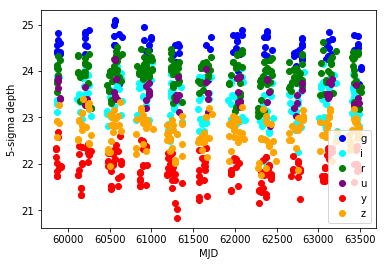

In [31]:
# let's make a plot
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in np.unique(relevant_df['filter'].values):
    in_filt = np.where(relevant_df['filter'].values == fn)[0]
    plt.plot(relevant_df['observationStartMJD'].values[in_filt],
             relevant_df['fiveSigmaDepth'].values[in_filt], 'o',
            color=f2c[fn], label=fn)
plt.xlabel('MJD')
plt.ylabel('5-sigma depth')
plt.legend()

In [26]:
np.unique(relevant_df['filter'].values)

array(['g', 'i', 'r', 'u', 'y', 'z'], dtype=object)